#### This simple strategy is for demonstration only! Momentum effect is a market anomaly. Classic financial theory assumes that the market is efficient, thus it’s impossible to outperform the market benchmark. However, due to investors’ cognitive biases, momentum effect has been proven to be a profitable strategy overtime, especially for small players (such as retail traders) whose trading size is so small, it won’t affect the market micro structure. However, for big players such as institution investors, when their trade size are too big, it will affect market micro structure, and price will run away from them. For big player, a good execution strategy is more important.  https://en.wikipedia.org/wiki/Momentum_(finance)

#### A moving average is commonly used with time series data to smooth out short-term fluctuations and highlight longer-term trends or cycles. The threshold between short-term and long-term depends on the application, and the parameters of the moving average will be set accordingly. For example, it is often used in technical analysis of financial data, like stock prices, returns or trading volumes. https://en.wikipedia.org/wiki/Moving_average

### NOTES
- Get historical data from yahoo finance API
- Caculate Fast and Slow moving averages 
- Rule: when Fast moving average (shorter period) is above Slow moving average (longer period) we go long
- Rule: when Slow moving average is above Fast moving average we go Short
- We buy or short selling 1000 shares based on signal. If the signal doesn't change, we hold the position
- This simple demo ingores transaction cost and the cost of short selling
- This is strategy is simplified for this demo

### First import all Libraries

In [1]:
#import libraries 
import pandas as pd

#Don't forget to install datareader from the terminal, pip 
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt

#%matplotlib inline
from pandas.plotting import register_matplotlib_converters 
register_matplotlib_converters()
import matplotlib.dates as mdates
print("Libraries imported")

Libraries imported


### Get Historical Data from Yahoo Finance API and store as a pandas dataframe

##### Some stock symbols:
- TOMTOM: TOM2.AS
- TESLA: TSLA
- Be Semiconductors BESI.AS
- Amsterdam AEX index: ^AEX
- S&P500 ^GSPC

In [2]:
# read csv file as a pandas dataframe. CSV downloaded from yahoo finance
# if no datareader installed, download CSV file of historical price and read csv from the local folder
# df = pd.read_csv('TOM2AS.csv', index_col=['Date']) , read from locak folder
# df = pdr.get_data_yahoo('^GSPC', '1997-05-01') , for trading index use longer period SlowMA such as 200, 300

df = pdr.get_data_yahoo('BESI.AS', '2013-05-01')


In [3]:
# The dataset contains Date, Open, high, low, and close (closed price)
df.head(10)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-05-02,3.6000,3.5000,3.5000,3.5985,374958.0,2.089920
2013-05-03,3.6100,3.5750,3.5750,3.5865,197270.0,2.082951
2013-05-06,3.6000,3.5810,3.5955,3.5810,55436.0,2.079757
2013-05-07,3.6145,3.5470,3.6000,3.6140,208560.0,2.098922
2013-05-08,3.6150,3.5750,3.6150,3.6125,75338.0,2.098051
2013-05-09,3.7245,3.6190,3.6250,3.7145,507658.0,2.157290
2013-05-10,3.7500,3.7005,3.7005,3.7450,418904.0,2.175004
2013-05-13,3.8000,3.7490,3.7500,3.8000,266850.0,2.206946
2013-05-14,3.8000,3.7800,3.8000,3.7900,209724.0,2.201138


### We only Daily Close price for this strategy 

#### Create a new dataframe for Close, Slow moving average, Fast moving average

In [4]:
dfClose = pd.DataFrame(df.Close)
dfClose.head()

,Close
Date,
2013-05-02,3.5985
2013-05-03,3.5865
2013-05-06,3.5810
2013-05-07,3.6140
2013-05-08,3.6125


#### In this demo I use 10 days as fasting moving average, 2 trading weeks. Use 42 as Slow moving average, 2 trading months

In [5]:
#fast moving average, set center =True, smooth it out so it lag a little bit
dfClose['MAFast'] = dfClose.Close.rolling(window=15, center=True).mean()
#fast_rolling.head()
dfClose['MAFast'].head()


Date
2013-05-02   NaN
2013-05-03   NaN
2013-05-06   NaN
2013-05-07   NaN
2013-05-08   NaN
Name: MAFast, dtype: float64

In [6]:
dfClose['MASlow'] = dfClose.Close.rolling(window=50, center=True).mean()
#slow_rolling.tail()

<function matplotlib.pyplot.show(*args, **kw)>

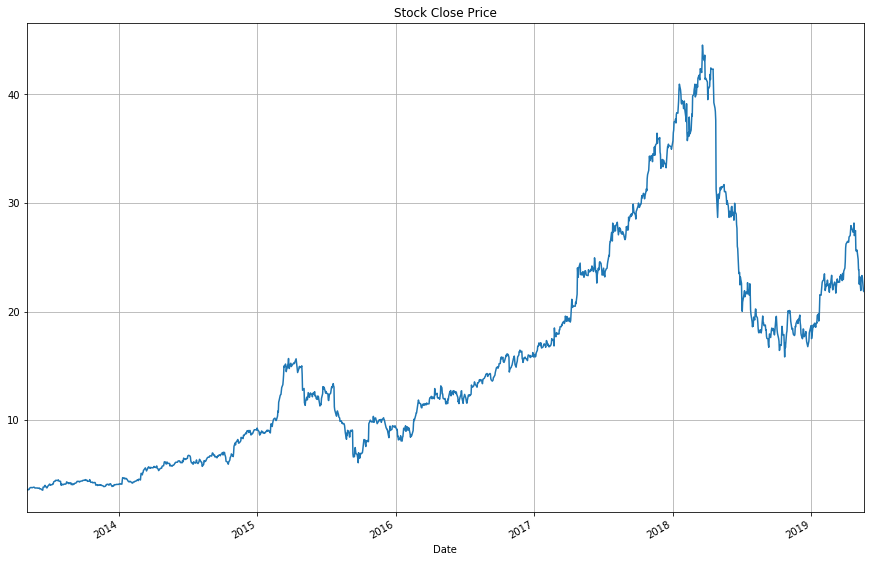

In [7]:
#plot the close price
plt.figure(figsize=(15,10))
dfClose['Close'].plot(grid =True)
plt.title("Stock Close Price")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

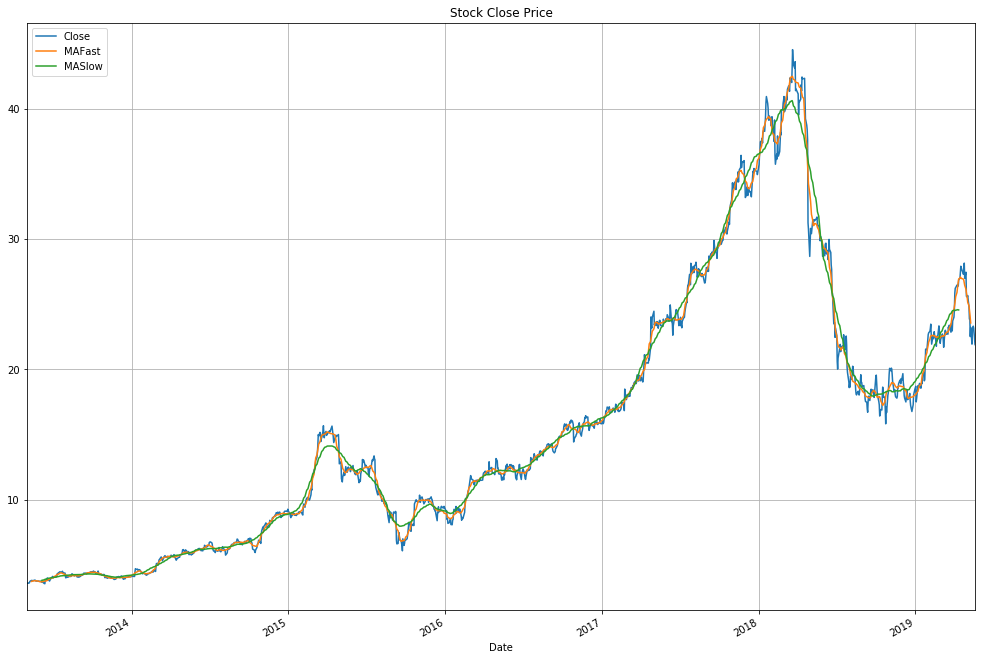

In [8]:
#plot the close price and MAs
plt.figure(figsize=(17,12))
dfClose['Close'].plot(grid =True)
dfClose['MAFast'].plot(grid =True)
dfClose['MASlow'].plot(grid =True)
plt.title("Stock Close Price")
plt.legend(loc=2)
plt.show

In [9]:
dfClose['Change'] = np.log(dfClose['Close']/dfClose['Close'].shift())

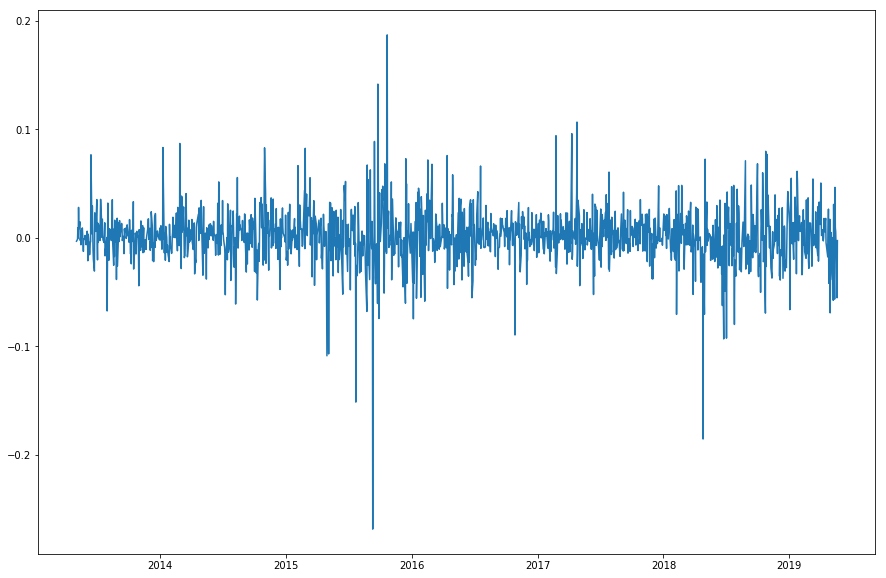

In [10]:
# How prices change fluctuats around 0
plt.figure(figsize=(15,10))
plt.plot(dfClose.Change)

##### Caculate the histroical volatility of equity, 21 trading days a month and shift one day, so volatility is on the next day

##### Volatility is very important for trading in real world, a good strategy should adjust position sizes based on volatility or Average True Range, in this demo, we just take a look of simple way of pulling out volatility from stock price.

In [11]:
# use standard deviation to measure the volatility 
dfClose['Volatility'] = dfClose.Change.rolling(21).std().shift()
dfClose.head()

,Close,MAFast,MASlow,Change,Volatility
Date,,,,,
2013-05-02,3.5985,NaN,NaN,NaN,NaN
2013-05-03,3.5865,NaN,NaN,-0.003340,NaN
2013-05-06,3.5810,NaN,NaN,-0.001535,NaN
2013-05-07,3.6140,NaN,NaN,0.009173,NaN
2013-05-08,3.6125,NaN,NaN,-0.000415,NaN


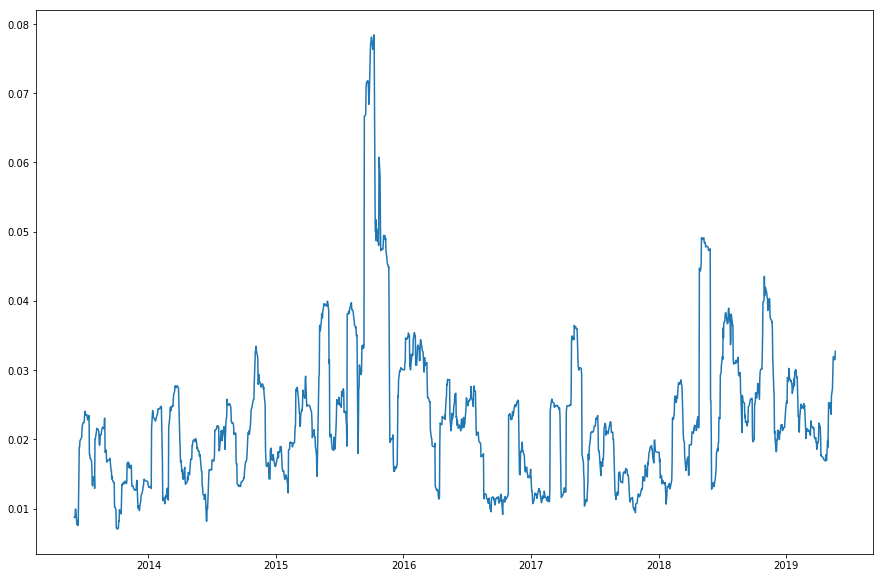

In [12]:
plt.figure(figsize=(15,10))
plt.plot(dfClose.Volatility)

#### Higher Volatility  makes it a good stock for swing trading

In [13]:
dfCloseTrade = dfClose.dropna()
dfCloseTrade.head()

,Close,MAFast,MASlow,Change,Volatility
Date,,,,,
2013-06-06,3.6750,3.693933,3.80227,0.003134,0.009921
2013-06-07,3.6740,3.707267,3.81360,-0.000272,0.009933
2013-06-10,3.6165,3.723767,3.82816,-0.015774,0.007766
2013-06-11,3.5710,3.736900,3.84404,-0.012661,0.008173
2013-06-12,3.5570,3.746433,3.85928,-0.003928,0.007608


#### If MA fast(shorter time period) is above MA Slow, stock shows upwards momentum; If MA fast is below MA slow, stock show downwards momentum

In [14]:
#Generate a boolean variable, Long, if False mean Short the stock, if True means Long the stock
Long=  dfCloseTrade['MAFast'] >= dfCloseTrade['MASlow']
Long.head()

Date
2013-06-06    False
2013-06-07    False
2013-06-10    False
2013-06-11    False
2013-06-12    False
dtype: bool

In [15]:
df1 = pd.DataFrame(Long,columns=['Long'])
df1.head()

,Long
Date,
2013-06-06,False
2013-06-07,False
2013-06-10,False
2013-06-11,False
2013-06-12,False


In [16]:
df_new = pd.concat([df1, dfCloseTrade],axis=1)

In [17]:
df_new.head(10)

,Long,Close,MAFast,MASlow,Change,Volatility
Date,,,,,,
2013-06-06,False,3.6750,3.693933,3.80227,0.003134,0.009921
2013-06-07,False,3.6740,3.707267,3.81360,-0.000272,0.009933
2013-06-10,False,3.6165,3.723767,3.82816,-0.015774,0.007766
2013-06-11,False,3.5710,3.736900,3.84404,-0.012661,0.008173
2013-06-12,False,3.5570,3.746433,3.85928,-0.003928,0.007608
2013-06-13,False,3.5425,3.746667,3.87605,-0.004085,0.007610
2013-06-14,False,3.8235,3.752833,3.89093,0.076334,0.007582
2013-06-17,False,3.8365,3.766733,3.90501,0.003394,0.018892
2013-06-18,False,3.9500,3.784500,3.91759,0.029155,0.018871


In [18]:
df_new1 =df_new

In [19]:
#Caculate price change useing previousClose - Close, use shift() to achieve this
df_new1['PriceChange'] = df_new['Close']-df_new['Close'].shift()

In [20]:
df_new1.head()

,Long,Close,MAFast,MASlow,Change,Volatility,PriceChange
Date,,,,,,,
2013-06-06,False,3.6750,3.693933,3.80227,0.003134,0.009921,NaN
2013-06-07,False,3.6740,3.707267,3.81360,-0.000272,0.009933,-0.0010
2013-06-10,False,3.6165,3.723767,3.82816,-0.015774,0.007766,-0.0575
2013-06-11,False,3.5710,3.736900,3.84404,-0.012661,0.008173,-0.0455
2013-06-12,False,3.5570,3.746433,3.85928,-0.003928,0.007608,-0.0140


### Assume that : We buy 1000 share, or short sell 1000 share of stock based on signal 
- Long stock benefits from price moving upward
- Short selling benefits from price moving downward

In [21]:
df_new1.head()

,Long,Close,MAFast,MASlow,Change,Volatility,PriceChange
Date,,,,,,,
2013-06-06,False,3.6750,3.693933,3.80227,0.003134,0.009921,NaN
2013-06-07,False,3.6740,3.707267,3.81360,-0.000272,0.009933,-0.0010
2013-06-10,False,3.6165,3.723767,3.82816,-0.015774,0.007766,-0.0575
2013-06-11,False,3.5710,3.736900,3.84404,-0.012661,0.008173,-0.0455
2013-06-12,False,3.5570,3.746433,3.85928,-0.003928,0.007608,-0.0140


##### For short positions, negative PositionValue means positive return

#### Create a dataframe that only contains trade and Position Value 

In [22]:
dfTrade = df_new1[['Long','Close']].copy()

##### If Column Long == True, we shoud be in Long position. If Column Long ==False, We should be in Short position

In [23]:
dfTrade =dfTrade.dropna()
dfTrade.head(15)

,Long,Close
Date,,
2013-06-06,False,3.6750
2013-06-07,False,3.6740
2013-06-10,False,3.6165
2013-06-11,False,3.5710
2013-06-12,False,3.5570
2013-06-13,False,3.5425
2013-06-14,False,3.8235
2013-06-17,False,3.8365
2013-06-18,False,3.9500


In [24]:
dfTrade1 = dfTrade

## Signals
#### - A Long signal is generated when Long column change from False to True
#### - A Short signal is generated when Long column change from True to False

In [25]:
dfTrade1['Hold'] = dfTrade1['Long']-dfTrade1['Long'].shift()
dfTrade1.head()
# This can also achieved by useing diff()

,Long,Close,Hold
Date,,,
2013-06-06,False,3.6750,NaN
2013-06-07,False,3.6740,0
2013-06-10,False,3.6165,0
2013-06-11,False,3.5710,0
2013-06-12,False,3.5570,0


#### Notice from the above Dataframe 
#### - When Hold ==1 we should close short & open Long position 
#### - When Hold == -1 we should  close Long &  open a short position
    - NOTE: ignore column Long for now, it's uselss now

In [26]:
DfTrade2 = dfTrade1.loc[dfTrade1['Hold'] != 0]
DfTrade2.head(10)

,Long,Close,Hold
Date,,,
2013-06-06,False,3.6750,NaN
2013-07-03,True,4.0030,1
2013-08-02,False,4.1200,-1
2013-09-13,True,4.3500,1
2013-10-25,False,4.2430,-1
2014-01-03,True,4.1440,1
2014-01-28,False,4.3550,-1
2014-02-28,True,5.1000,1
2014-04-04,False,5.7125,-1


In [27]:
DfTrade2 = DfTrade2.dropna()
# Change of 1 share of stock * 1000 share, assume our position size is 1000
DfTrade2['PositionChange'] = (DfTrade2['Close']-DfTrade2['Close'].shift())*1000
DfTrade2.head(20)

,Long,Close,Hold,PositionChange
Date,,,,
2013-07-03,True,4.0030,1,NaN
2013-08-02,False,4.1200,-1,117.000103
2013-09-13,True,4.3500,1,230.000019
2013-10-25,False,4.2430,-1,-106.999874
2014-01-03,True,4.1440,1,-98.999977
2014-01-28,False,4.3550,-1,210.999966
2014-02-28,True,5.1000,1,744.999886
2014-04-04,False,5.7125,-1,612.500191
2014-04-28,True,5.7925,1,79.999924


In [28]:
DfTrade2 = DfTrade2.dropna()

####  When Hold == -1 we should close Long & open Short position, so the Position Change Column is the return of closed previous Long position


In [29]:
DfLongReturn = DfTrade2.loc[DfTrade2['Hold'] == -1]
DfLongReturn.head()

,Long,Close,Hold,PositionChange
Date,,,,
2013-08-02,False,4.1200,-1,117.000103
2013-10-25,False,4.2430,-1,-106.999874
2014-01-28,False,4.3550,-1,210.999966
2014-04-04,False,5.7125,-1,612.500191
2014-05-15,False,5.7750,-1,-17.499924


#### When Hold ==1 we should close short & open Long position, so the Position Change Column is the return of closed previous short position


#### Subset dataframe into 2 dataframes, one contains Long trades' Position Change, another one only contains Short trades's Position Change

In [30]:
DfShortReturn = DfTrade2.loc[DfTrade2['Hold'] == 1]
DfShortReturn.head()

,Long,Close,Hold,PositionChange
Date,,,,
2013-09-13,True,4.3500,1,230.000019
2014-01-03,True,4.1440,1,-98.999977
2014-02-28,True,5.1000,1,744.999886
2014-04-28,True,5.7925,1,79.999924
2014-06-11,True,6.1100,1,335.000038


In [31]:
totalLongReturn = DfLongReturn['PositionChange'].sum()
print(totalLongReturn)

16565.500259399414


##### Since Short selling benefit from decreasing price , when the number is negative, it's actaully good. So we need to change positive to negative, or negative to abs()

In [32]:
totalShortReturn = -DfShortReturn['PositionChange'].sum()
print(totalShortReturn)

-3441.500186920166


### The total return 

In [33]:
#The total return 
print('In 4 years our simple moving average strategy generated return:$',totalLongReturn + totalShortReturn)

In 4 years our simple moving average strategy generated return:$ 13124.000072479248


#### Trading of Be Semiconductors seems to produce good return from Long positions. Short selling stock sounds like a cool game, but Shorting is dangerous, espeically short equity Index, stock markets seems to have upwards bias. An interesting article https://jlcollinsnh.com/2012/04/19/stocks-part-ii-the-market-always-goes-up/

In [34]:
SandP = pdr.get_data_yahoo('^GSPC', '1980-01-01', '2019-04-30', interval='w')
SandP.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1980-01-01,108.430000,103.260002,107.940002,106.809998,174720000,106.809998
1980-01-08,111.440002,106.290001,106.809998,110.379997,280450000,110.379997
1980-01-15,112.900002,109.449997,110.379997,112.099998,269380000,112.099998
1980-01-22,115.650002,110.919998,112.099998,114.849998,261140000,114.849998
1980-01-29,117.169998,113.029999,114.849998,114.370003,262230000,114.370003


#### Charting S&P index from 1980 -01-01 to 2019-04-30

<function matplotlib.pyplot.show(*args, **kw)>

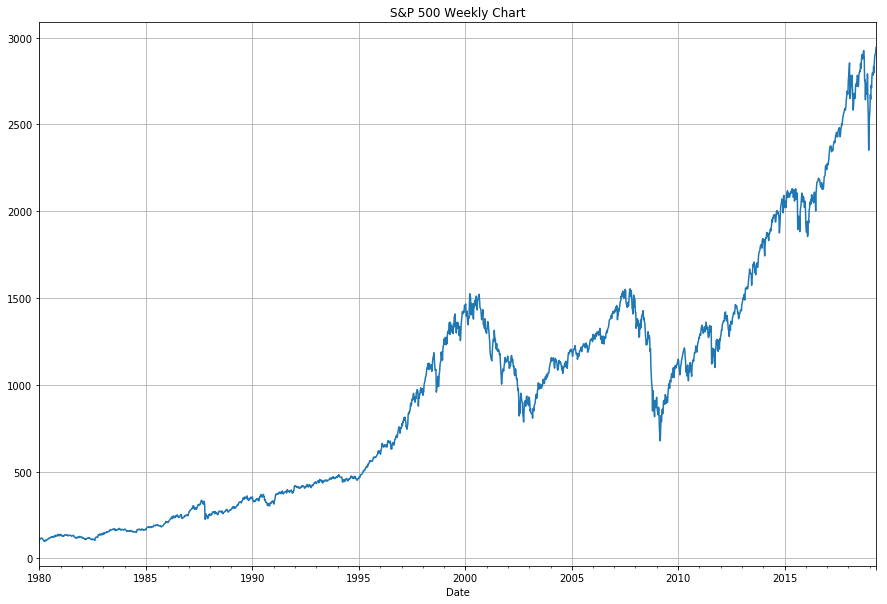

In [35]:
#plot the close price
plt.figure(figsize=(15,10))
SandP['Close'].plot(grid =True)
plt.title("S&P 500 Weekly Chart")
plt.show

### Note for average passive investors

#### If you look at S&P 's weekly chart above, the equity market seems to have upwards bias all the time. For average investors the best strategy might just be passive and buy Index ETF everytime the after market gets a correction(dip down),  and use momentum indicator as buy signal, exit the long trade when the momentum indictor give short signal. 